In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [109]:
ccdata = pd.read_csv('consumer_complains.csv', engine="python")

In [11]:
#population data credits: http://www.census.gov/2010census/data/ 
popn_data = pd.read_csv('pop_density_us.csv', engine="python")

In [12]:
popn_data.head()

,# POPULATION DENSITY DATA PROVIDED BY U.S. CENSUS.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,# DENSITY EXPRESSED AS PEOPLE PER SQUARE MILE.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# DENSITY RANKING EXPRESSED IN ORDER OF MOST D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
3,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29


In [15]:
popn_data.tail()

,# POPULATION DENSITY DATA PROVIDED BY U.S. CENSUS.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
51,Washington,1141990,1356621,1563396,1736191,2378963,2853214,3409169,4132156,4866692,...,37,37,37,35,32,30,30,30,27,27
52,West Virginia,1221119,1463701,1729205,1901974,2005552,1860421,1744237,1949644,1793477,...,15,15,15,15,22,27,27,28,31,31
53,Wisconsin,2333860,2632067,2939006,3137587,3434575,3951777,4417731,4705767,4891769,...,24,22,22,23,25,24,26,26,26,25
54,Wyoming,145965,194402,225565,250742,290529,330066,332416,469557,453588,...,50,50,50,50,50,51,51,51,51,51
55,Puerto Rico,1118012,1299809,1543913,1869255,2210703,2349544,2712033,3196520,3522037,...,5,5,5,2,4,4,3,3,3,3


In [82]:
# headers start on the 3rd column, so re-read, and use data on 
popn_data = pd.read_csv('pop_density_us.csv', engine="python", header=3)

In [83]:
popn_data.columns.values

array(['STATE_OR_REGION', '1910_POPULATION', '1920_POPULATION',
       '1930_POPULATION', '1940_POPULATION', '1950_POPULATION',
       '1960_POPULATION', '1970_POPULATION', '1980_POPULATION',
       '1990_POPULATION', '2000_POPULATION', '2010_POPULATION',
       '1910_DENSITY', '1920_DENSITY', '1930_DENSITY', '1940_DENSITY',
       '1950_DENSITY', '1960_DENSITY', '1970_DENSITY', '1980_DENSITY',
       '1990_DENSITY', '2000_DENSITY', '2010_DENSITY', '1910_RANK',
       '1920_RANK', '1930_RANK', '1940_RANK', '1950_RANK', '1960_RANK',
       '1970_RANK', '1980_RANK', '1990_RANK', '2000_RANK', '2010_RANK'], dtype=object)

In [84]:
# using the most recent census data (2010_POPULATION)
popn_data.head()

,STATE_OR_REGION,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,United States,92228531,106021568,123202660,132165129,151325798,179323175,203211926,226545805,248709873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,...,25,24,23,24,28,28,28,27,28,29
2,Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,...,52,52,52,52,52,52,52,52,52,52
3,Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,...,49,47,47,47,43,43,42,39,38,35
4,Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,...,31,32,32,34,36,37,37,37,36,36


In [85]:
popn_data.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52],
           dtype='int64')

In [87]:
popn_data.index = popn_data.STATE_OR_REGION

In [195]:
pop2010 = popn_data.loc[:,['STATE_OR_REGION','2010_POPULATION']] # STATE_OR_REGION  COUNT
pop2010.columns = ['STATE_OR_REGION','POPULATION']

In [128]:
ccdata.head(3)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN


In [145]:
ccdata2 = ccdata.loc[:,['State']]
ccdata2.fillna('Unspecified', inplace=True)
ccdata_counts = ccdata2.State.value_counts()

Index(['CA', 'FL', 'TX', 'NY', 'GA', 'NJ', 'PA', 'IL', 'VA', 'MD', 'OH', 'NC',
       'MI', 'AZ', 'MA', 'WA', 'CO', 'TN', 'Unspecified', 'MO', 'CT', 'SC',
       'OR', 'MN', 'NV', 'WI', 'IN', 'AL', 'LA', 'KY', 'OK', 'DC', 'NH', 'DE',
       'UT', 'KS', 'NM', 'MS', 'AR', 'IA', 'HI', 'RI', 'ME', 'ID', 'NE', 'WV',
       'PR', 'VT', 'MT', 'SD', 'AK', 'WY', 'ND', 'AE', 'AP', 'VI', 'GU', 'FM',
       'MH', 'MP', 'AS', 'AA', 'PW'],
      dtype='object')

In [129]:
#state_names
state_names = pd.read_csv('state_table.csv', engine="python")

In [133]:
state_names.head(3)

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,1,Alabama,AL,USA,state,10,current,occupied,NaN,1,Ala.,IV,3,South,6,East South Central,11
1,2,Alaska,AK,USA,state,10,current,occupied,NaN,2,Alaska,X,4,West,9,Pacific,9
2,3,Arizona,AZ,USA,state,10,current,occupied,NaN,4,Ariz.,IX,4,West,8,Mountain,9


In [157]:
state_names = state_names.loc[:,['name','abbreviation']]
state_names.index = state_names['abbreviation']

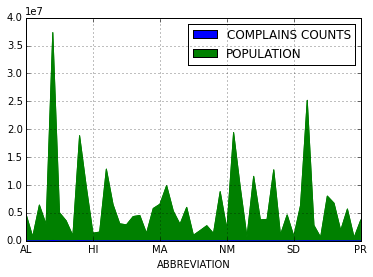

In [225]:
import math
#popn2010 state_or_region pop (fullname, number)
#ccdata_counts state_name count (abbr, number)
#state_names fullname abbreviation
concatenated = pd.concat([state_names, ccdata_counts], axis=1, join='inner')
concatenated.columns = ['STATE', 'ABBREVIATION', 'COMPLAINS COUNTS']
concatenated.index = concatenated['STATE']
concatenated = pd.concat([concatenated, pop2010], axis=1, join='inner')
concatenated.index = concatenated['ABBREVIATION']
concatenated.plot(kind='area')